In [6]:
import base64
from io import BytesIO
from PIL import Image
import PIL
#image = Image.open('test_img.jpg')

In [7]:
def PIL_to_base64(image:PIL.Image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str =buffered.getvalue().decode('latin1')
    return img_str
def base64_to_PIL(img_str:str):
    return Image.open(BytesIO((img_str.encode('latin1'))))


In [ ]:
img_str = PIL_to_base64(Image.open('/content/test_img.jpg'))

In [ ]:
%%time
import requests

#api
url = 'https://bfab-34-32-141-49.ngrok-free.app'
#input
"""
base_image: string base64 image
x_points: [x1,x2,x3] ...
y_points: [y1,y2,y3] ...
"""
mydata = {'base_image': img_str,
         'x_points':[720,320],
         'y_points':[350,265],}

x = requests.post(url=url+'/segment/',json=mydata)
print(x.status_code)

200
CPU times: user 159 ms, sys: 6.8 ms, total: 166 ms
Wall time: 5.99 s


In [ ]:
import json
output = json.loads(x.content)

In [ ]:
import cv2
import numpy as np
colors = [(255, 0, 0), (0, 255, 0)]
markers = [1, 5]
x_points=[720,320]
y_points=[350,265]
points = zip(y_points,x_points)
img = np.array(image)
for point in points:
            cv2.drawMarker(img, point, colors[0], markerType=markers[0], markerSize=10, thickness=3)

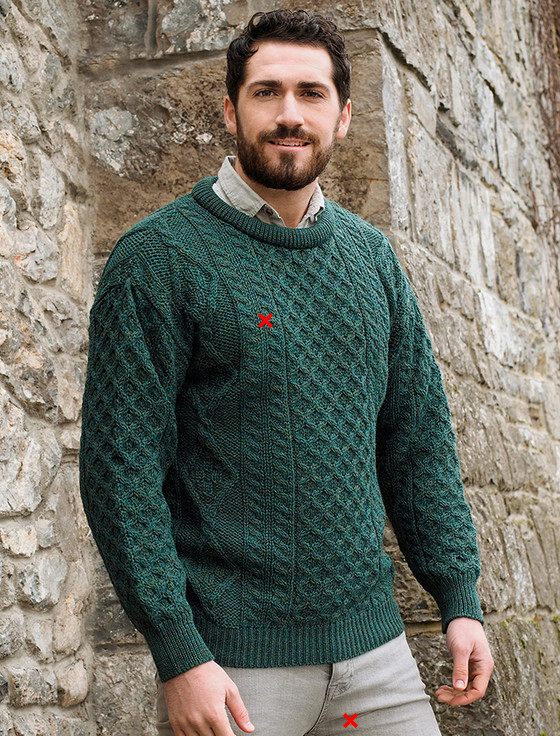

In [ ]:
Image.fromarray(img)

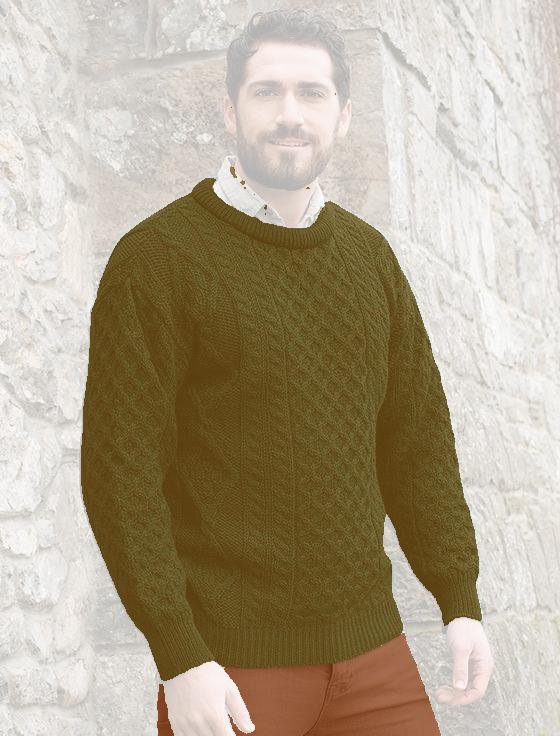

In [ ]:
base64_to_PIL(output['results'])

In [9]:
str_img = PIL_to_base64(Image.open('/content/test9.jpg'))
str_mask = PIL_to_base64(Image.open('/content/test9_mask.png'))

In [23]:
import requests

#api
url = 'https://5d75-34-90-8-227.ngrok-free.app'

"""
input:
    img_base64: string base64 image
    mask_base64: string base64 mask
    user_prompt: string prompt
    negative_prompt: string negative prompt
    quality: int 0-2
    n_sample: int
output:
    results: list of base64 image
"""
mydata = {'img_base64':str_img,
          'mask_base64':str_mask,
          'user_prompt':None,
          'negative_prompt':None,
          'quality':2,
          "n_sample":2,}

x = requests.post(url=url+'/model_gen/',json=mydata)
print(x.status_code)

200


In [24]:
import json
output = json.loads(x.content)
output.keys()

dict_keys(['results'])

In [25]:
len(output['results'])

2

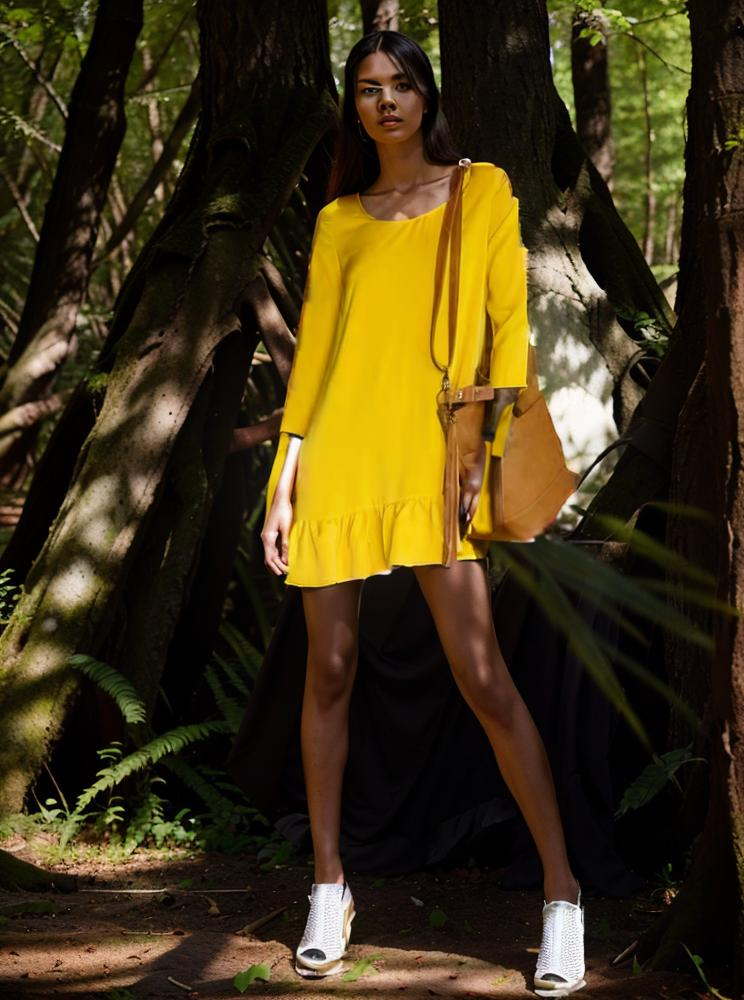

In [26]:
base64_to_PIL(output['results'][0])

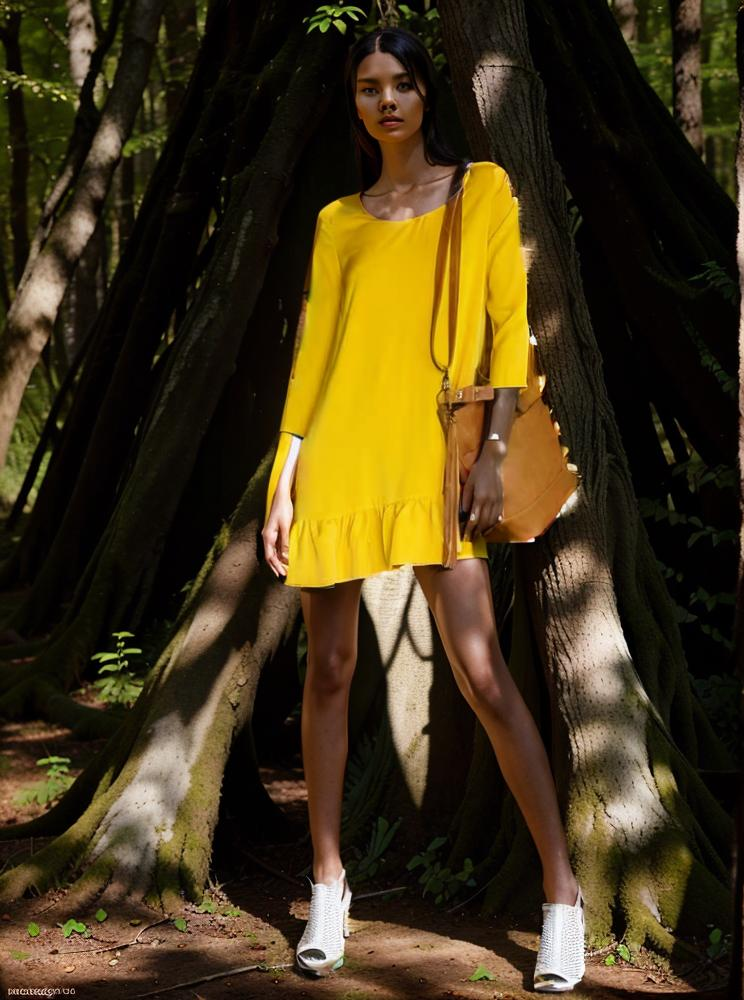

In [27]:
base64_to_PIL(output['results'][1])